In [1]:
import pandas as pd

late_shipments = pd.read_feather('/kaggle/input/late-shipments-dataset-to-perform-hypothesis-test/late_shipments.feather')
print(late_shipments)

          id       country managed_by  fulfill_via vendor_inco_term  \
0    36203.0       Nigeria   PMO - US  Direct Drop              EXW   
1    30998.0      Botswana   PMO - US  Direct Drop              EXW   
2    69871.0       Vietnam   PMO - US  Direct Drop              EXW   
3    17648.0  South Africa   PMO - US  Direct Drop              DDP   
4     5647.0        Uganda   PMO - US  Direct Drop              EXW   
..       ...           ...        ...          ...              ...   
995  13608.0        Uganda   PMO - US  Direct Drop              DDP   
996  80394.0    Congo, DRC   PMO - US  Direct Drop              EXW   
997  61675.0        Zambia   PMO - US  Direct Drop              EXW   
998  39182.0  South Africa   PMO - US  Direct Drop              DDP   
999   5645.0      Botswana   PMO - US  Direct Drop              EXW   

    shipment_mode  late_delivery late product_group    sub_classification  \
0             Air            1.0  Yes          HRDT              HIV t

# Calculating the sample mean
The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

You'll begin your analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

In pandas, a value's proportion in a categorical DataFrame column can be quickly calculated using the syntax:

* prop = (df['col'] == val).mean()


* Calculate the proportion of late shipments in the sample; that is, the mean cases where the late column is "Yes".

In [2]:
# Print the late_shipments dataset
# print(late_shipments)

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == "Yes").mean()

# Print the results
print(late_prop_samp)

0.061


Cool calculating! The proportion of late shipments in the sample is 0.061, or 6.1%.

### Calculating a z-score
Since variables have arbitrary ranges and units, we need to standardize them. For example, a hypothesis test that gave different answers if the variables were in Euros instead of US dollars would be of little value. Standardization avoids that.

One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

The sample statistic is available as late_prop_samp.

late_shipments_boot_distn is a bootstrap distribution of the proportion of late shipments, available as a list.


* Hypothesize that the proportion of late shipments is 6%.
* Calculate the standard error from the standard deviation of the bootstrap distribution.
* Calculate the z-score.

In [3]:
#Create bootstrap distribution for proportion of late shipments
late_shipments_boot_distn = []

# Repeat many times (typically 5000-10000)
for i in range(5000):
    # Resample with replacement
    boot_sample = late_shipments.sample(frac=1, replace=True)
    
    # Calculate proportion of late shipments in bootstrap sample
    boot_prop = boot_sample['late'].value_counts(normalize=True)['Yes']
    
    # Append to bootstrap distribution
    late_shipments_boot_distn.append(boot_prop)

In [4]:
import numpy as np

# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof =1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Print z_score
print(z_score)

0.13200683310800926


Zesty z-scoring! The z-score is a standardized measure of the difference between the sample statistic and the hypothesized statistic

Top tail choices! The tails of the distribution that are relevant depend on whether the alternative hypothesis refers to "greater than", "less than", or "differences between."

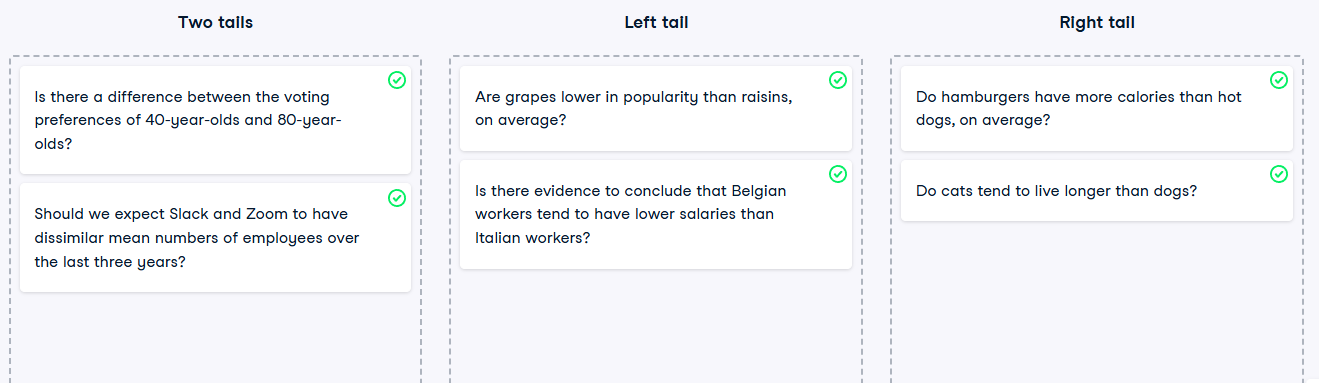

# Calculating p-values
In order to determine whether to choose the null hypothesis or the alternative hypothesis, you need to calculate a p-value from the z-score.

You'll now return to the late shipments dataset and the proportion of late shipments.

The null hypothesis, 

, is that the proportion of late shipments is six percent.

The alternative hypothesis, 

, is that the proportion of late shipments is greater than six percent.

The observed sample statistic, late_prop_samp, the hypothesized value, late_prop_hyp (6%), and the bootstrap standard error, std_error are available. norm from scipy.stats has also been loaded without an alias.

* Calculate the z-score of late_prop_samp.
* Calculate the p-value for the z-score, using a right-tailed test.


### This is an right tailed test 

In [6]:
from scipy.stats import norm

# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print(p_value) 

0.44748944350582864


Perfect p-value! The p-value is calculated by transforming the z-score with the standard normal cumulative distribution function.


## Decisions from p-values
The p-value, denoted here as 
, is a measure of the amount of evidence to reject the null hypothesis or not. By comparing the p-value to the significance level, 
, you can make a decision about which hypothesis to support.

Which of the following is the correct conclusion from the decision rule for a significance level ?

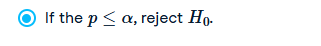

# Calculating a confidence interval
If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state a confidence interval. That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).

Sampling in Python demonstrated two methods for calculating confidence intervals. Here, you'll use quantiles of the bootstrap distribution to calculate the confidence interval.

late_prop_samp and late_shipments_boot_distn are available; pandas and numpy are loaded with their usual aliases.


* Calculate a 95% confidence interval from late_shipments_boot_distn using the quantile method, labeling the lower and upper intervals lower and upper.



In [7]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.046, 0.076)


* Does the confidence interval match up with the conclusion to stick with the original assumption that 6% is a reasonable value for the unknown population parameter?
Possible answers


**Yes, since 0.06 is included in the 95% confidence interval and we failed to reject due to a large p-value, the results are similar.**

Cool and confident! When you have a confidence interval width equal to one minus the significance level, if the hypothesized population parameter is within the confidence interval, you should fail to reject the null hypothes

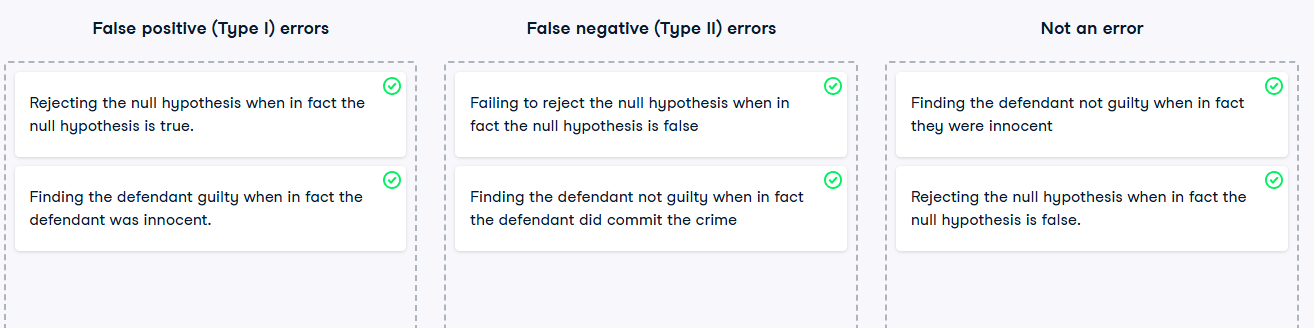